In [1]:
%cd ..

C:\Users\Cliente\Documents\PAC\cnn


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import rotate
from celluloid import Camera
from src import data
from src import visualize as vs
from IPython.display import Image

In [3]:
def FFT(x):
    return np.abs(np.fft.fft(x))

def Cxx(x):
    return np.correlate(x, x, mode='same')

def PSD(x):
    return FFT(Cxx(x))

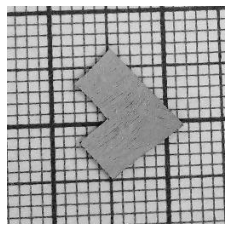

In [4]:
img, G = data.load_random(grayscale=True)
vs.plot_image(img, cmap='gray')

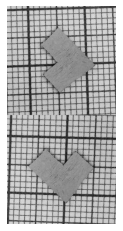

In [5]:
I = np.concatenate((img[0, :, :, 0].numpy(), img[0, :, :, 0].numpy().T), axis=0)
vs.plot_image(I, cmap='gray')

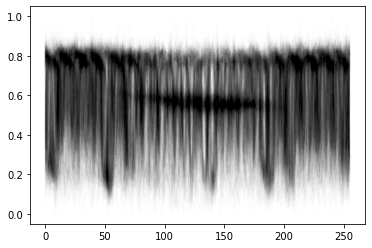

In [6]:
for x in I: plt.plot(x, 'k-', alpha=0.01)
plt.show()

In [7]:
freqs = np.fft.fftfreq(I.shape[1])
loc = freqs > 0
freqs.shape

(256,)

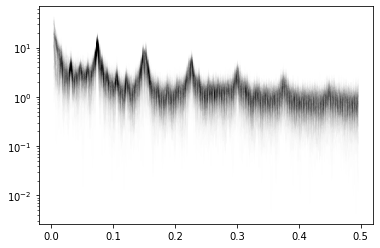

In [8]:
for y in map(FFT, I): plt.plot(freqs[loc], y[loc], 'k-', alpha=0.005)
plt.semilogy()
plt.show()

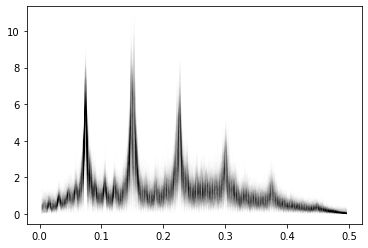

In [9]:
for y in map(FFT, np.gradient(I)[1]):
    plt.plot(freqs[loc], y[loc], 'k-', alpha=0.005)
plt.show()

CPU times: total: 62.5 ms
Wall time: 96 ms


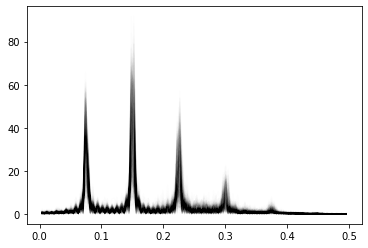

In [10]:
%time F = list(map(PSD, np.gradient(I)[1]))
for y in F:
    plt.plot(freqs[loc], y[loc], 'k-', alpha=0.007)
plt.show()

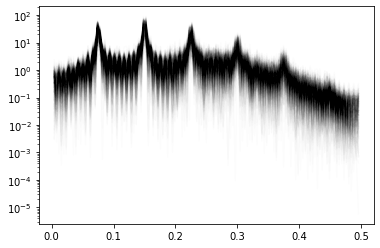

In [11]:
for y in F:
    plt.plot(freqs[loc], y[loc], 'k-', alpha=0.01)
plt.semilogy()
plt.show()

In [12]:
T = 0.1

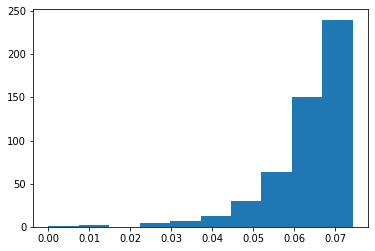

In [13]:
h, bins, _ = plt.hist([np.abs(freqs[y > tf.reduce_max(y)*T]).min() for y in F])
plt.show()

In [14]:
max_h = h == h.max()
np.mean((bins[1:][max_h], bins[:-1][max_h]))

0.07050781249999999

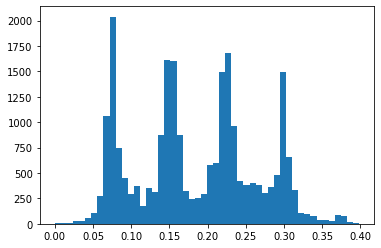

In [15]:
plt.hist(np.concatenate([np.abs(freqs[y > tf.reduce_max(y)*T]) for y in F]), bins=50)
plt.show()

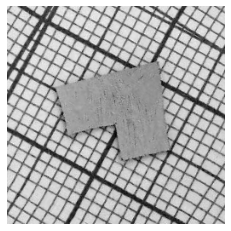

In [16]:
I = rotate(img[0, :, :, 0].numpy(), 60, mode='reflect')
vs.plot_image(I, cmap='gray')

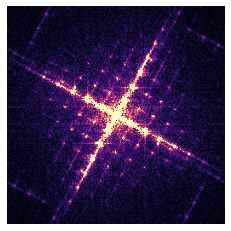

In [17]:
fft2d = np.abs(np.fft.fftshift(np.fft.fft2(I)))
vs.plot_image(fft2d, cmap='magma', vmax=fft2d.max()*25e-4)

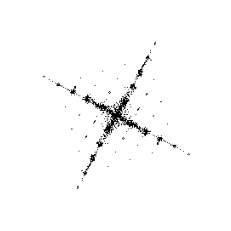

In [18]:
L = fft2d > fft2d.max()*0.0025
vs.plot_image(L, cmap='binary')

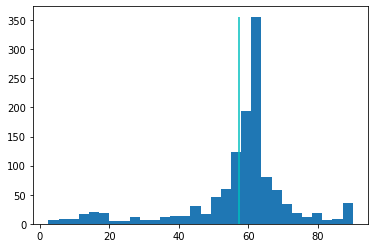

In [19]:
X, Y = np.meshgrid(*[np.fft.fftshift(freqs)]*2)
H = 90 - np.degrees(np.arctan2(Y[L], X[L]))%90
h, bins, _ = plt.hist(H, bins=30)
plt.vlines(H.mean(), 0, h.max(), color='c')
plt.show()

In [20]:
max_h = h == h.max()
a = np.mean((bins[1:][max_h], bins[:-1][max_h]))
a

62.288358425299734

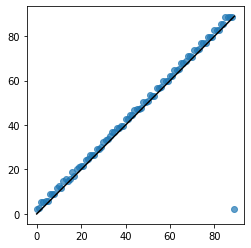

In [21]:
At = np.arange(90)
A = []
for a in At:
    I = rotate(img[0, :, :, 0].numpy(), a, mode='reflect')
    fft2d = np.abs(np.fft.fftshift(np.fft.fft2(I)))
    L = fft2d > fft2d.max()*0.0025
    X, Y = np.meshgrid(*[np.fft.fftshift(freqs)]*2)
    H = 90 - np.degrees(np.arctan2(Y[L], X[L]))%90
    h, bins = np.histogram(H, bins=30)
    max_h = h == h.max()
    a = np.mean((bins[1:][max_h], bins[:-1][max_h]))
    A.append(a)

fig, ax = plt.subplots()
ax.plot(At, A, 'o', alpha=0.7)
ax.plot(At, At, 'k-')
ax.set_aspect('equal')
plt.show()

In [22]:
fig = plt.figure(figsize=(13, 3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.axis('off')
ax2.axis('off')
ax3.set_xlabel('inclinação')
fig.tight_layout()

camera = Camera(fig)
for a in range(90):
    I = rotate(img[0, :, :, 0].numpy(), a, mode='reflect')
    fft2d = np.abs(np.fft.fftshift(np.fft.fft2(I)))
    L = fft2d > fft2d.max()*0.0025
    X, Y = np.meshgrid(*[np.fft.fftshift(freqs)]*2)
    H = 90 - np.degrees(np.arctan2(Y[L], X[L]))%90
    
    ax1.imshow(I, cmap='gray')
    ax2.imshow(fft2d, cmap='magma', vmax=fft2d.max()*25e-4)
    ax3.hist(H, bins=30, color='b')
    camera.snap()

animation = camera.animate()
animation.save('reports/figures/slope_detection.gif', writer='PillowWriter', fps=10)
plt.close()

MovieWriter PillowWriter unavailable; using Pillow instead.


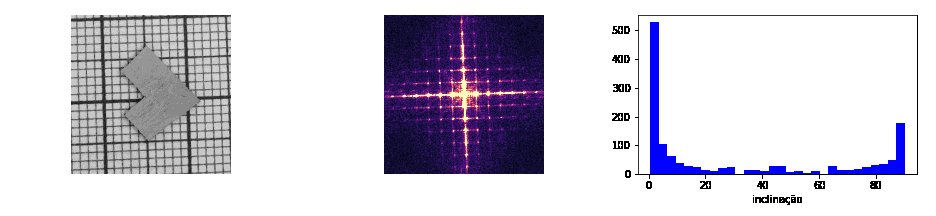

In [23]:
Image('reports/figures/slope_detection.gif')